In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# import warnings filter
from warnings import simplefilter

In [2]:
#Read the csv file
df=pd.read_csv('https://raw.githubusercontent.com/vikram0230/Henry-Harvin-project/master/train.csv',index_col = 'Loan_ID')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [3]:
#Replace values with binary
df['Loan_Status']=df['Loan_Status'].replace('Y',1)
df['Loan_Status']=df['Loan_Status'].replace('N',0)
df['Self_Employed']=df['Self_Employed'].replace('Yes',1)
df['Self_Employed']=df['Self_Employed'].replace('No',0)
df['Education']=df['Education'].replace('Graduate',1)
df['Education']=df['Education'].replace('Not Graduate',0)
df['Married']=df['Married'].replace('Yes',1)
df['Married']=df['Married'].replace('No',0)
df['Dependents']=df['Dependents'].replace('3+',3)
df.columns = [x.lower() for x in df.columns]
#Filling empty spaces with 0
df.isnull().sum()
df=df.fillna(0)
x=df.iloc[:,2:10]
y=df.iloc[:,11]

In [4]:
df.gender.unique()

array(['Male', 'Female', 0], dtype=object)

In [5]:
df.head(10)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
Loan_ID,,,,,,,,,,,,
LP001002,Male,0.0,0,1,0.0,5849,0.0,0.0,360.0,1.0,Urban,1
LP001003,Male,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
LP001011,Male,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,1
LP001013,Male,1.0,0,0,0.0,2333,1516.0,95.0,360.0,1.0,Urban,1
LP001014,Male,1.0,3,1,0.0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
LP001018,Male,1.0,2,1,0.0,4006,1526.0,168.0,360.0,1.0,Urban,1


In [6]:
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

## Parameter Check 

c:\users\subashini\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\subashini\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\subashini\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


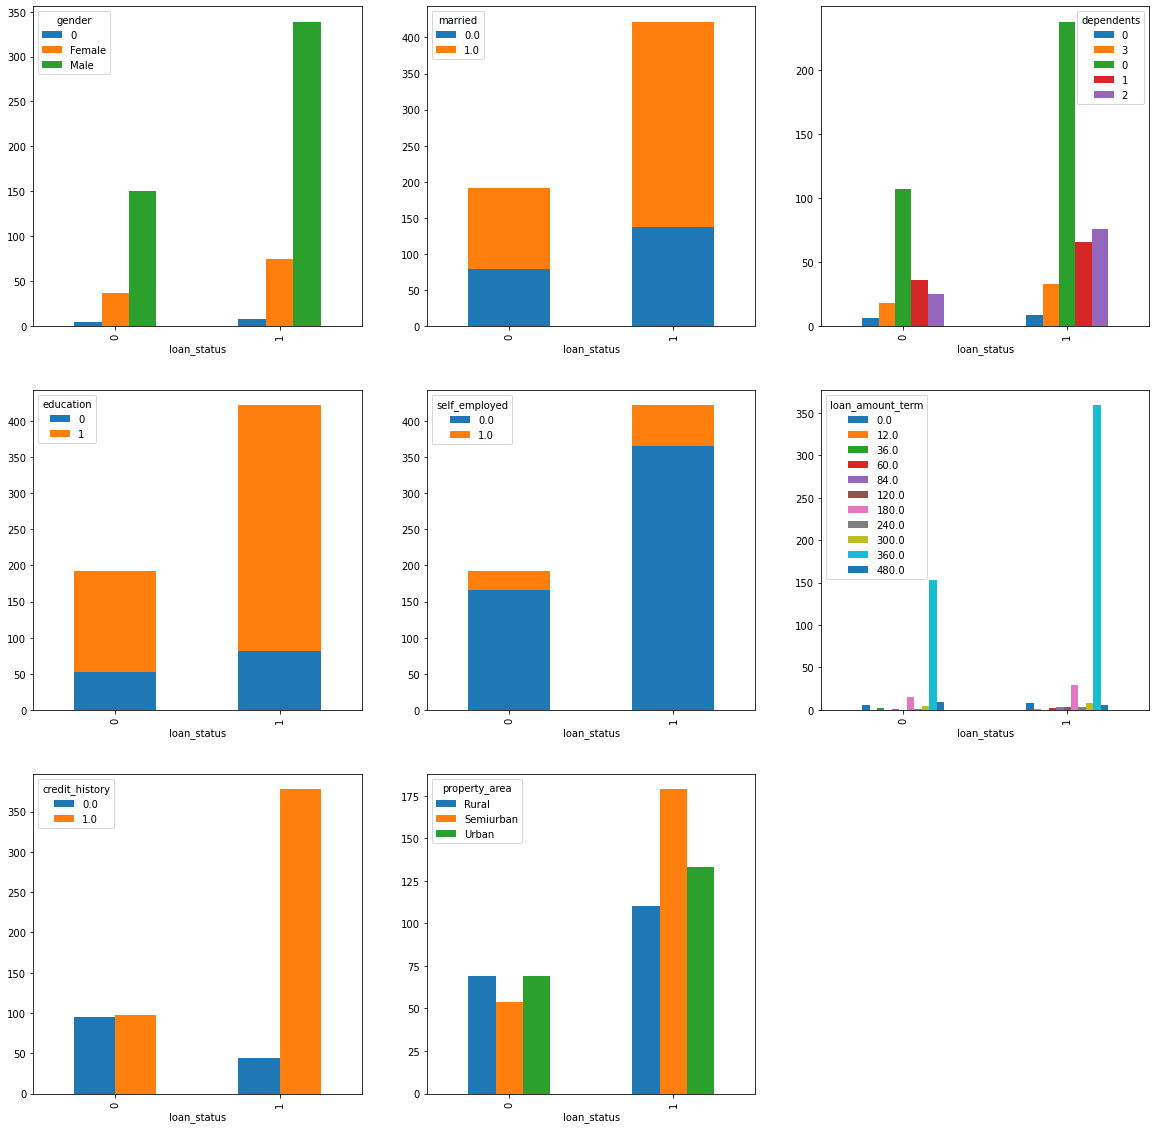

In [7]:
# simplefilter(action='ignore', category=MatplotlibDeprecationWarning)
# gender
ax1 = plt.subplot(331)
pd.crosstab(df.loan_status,df.gender).plot(kind = 'bar',ax=ax1,figsize=(20,20))
# married
ax2 = plt.subplot(332)
pd.crosstab(df.loan_status,df.married).plot(kind = 'bar',ax=ax2,stacked=True)
#dependents
ax3 = plt.subplot(333)
pd.crosstab(df.loan_status,df.dependents).plot(kind = 'bar',ax=ax3)
# education
ax4 = plt.subplot(334)
pd.crosstab(df.loan_status,df.education).plot(kind = 'bar',ax=ax4,stacked=True)
# self_employed
ax5 = plt.subplot(335)
pd.crosstab(df.loan_status,df.self_employed).plot(kind = 'bar',ax=ax5,stacked=True)
# loan_amount_term
ax6 = plt.subplot(336)
pd.crosstab(df.loan_status,df.loan_amount_term).plot(kind = 'bar',ax=ax6)
# credit_history
ax7 = plt.subplot(337)
pd.crosstab(df.loan_status,df.credit_history).plot(kind = 'bar',ax=ax7)
# property_area
ax8 = plt.subplot(338)
pd.crosstab(df.loan_status,df.property_area).plot(kind = 'bar',ax=ax8)

In [8]:
app = df[['applicantincome','loan_status']]
coapp = df[['coapplicantincome','loan_status']]
lamt = df[['loanamount','loan_status']]

Text(0.5, 0, 'Applicant Income')

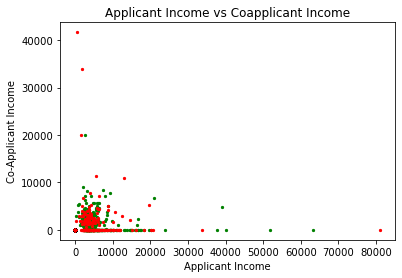

In [9]:
# applicant income vs coapplicant income
app_1 = app[app.loan_status == 1]
app_0 = app[app.loan_status == 0]
coapp_1 = coapp[coapp.loan_status == 1]
coapp_0 = coapp[coapp.loan_status == 0]

plt.scatter(app_1,coapp_1,s=5,color='green')
plt.scatter(app_0,coapp_0,s=5,color='red')
plt.title('Applicant Income vs Coapplicant Income')
plt.ylabel('Co-Applicant Income')
plt.xlabel('Applicant Income')

Text(0.5, 0, 'Applicant Income')

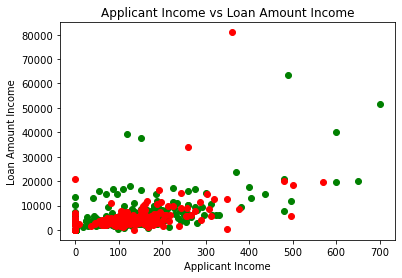

In [10]:
# loan amount vs applicant income
lamt_1 = lamt[lamt.loan_status == 1]
lamt_0 = lamt[lamt.loan_status == 0]

plt.scatter(lamt_1,app_1,color='green')
plt.scatter(lamt_0,app_0,color='red')
plt.title('Applicant Income vs Loan Amount Income')
plt.ylabel('Loan Amount Income')
plt.xlabel('Applicant Income')

Text(0.5, 0, 'Co-Applicant Income')

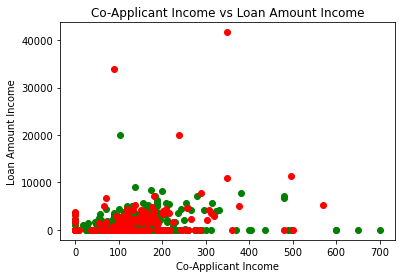

In [11]:
# loan amount vs coapplicant income
plt.scatter(lamt_1,coapp_1,color='green')
plt.scatter(lamt_0,coapp_0,color='red')
plt.title('Co-Applicant Income vs Loan Amount Income')
plt.ylabel('Loan Amount Income')
plt.xlabel('Co-Applicant Income')

## Classification

In [12]:
#Creating test and train model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(409, 8) (205, 8) (409,) (205,)


In [13]:
#Scaling the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [15]:
#Fitting the model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#predicting the model
y_predict=lr.predict(x_test)
print(y_predict)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1]


In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_predict)
print(cf)

[[ 29  31]
 [ 13 132]]


Text(0, 0.5, 'true positive rate')

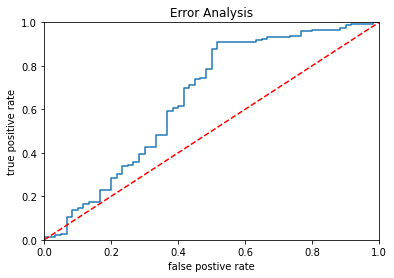

In [18]:
#ROC Curve
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Error Analysis')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.48      0.57        60
           1       0.81      0.91      0.86       145

    accuracy                           0.79       205
   macro avg       0.75      0.70      0.71       205
weighted avg       0.77      0.79      0.77       205



In [20]:
import sklearn
accuracy = sklearn.metrics.accuracy_score(y_test,y_predict)
accuracy

0.7853658536585366

### Prediction Accuracy: 78.5%